In [1]:
## IMPORTS

# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import preprocessing

# Train Test Split
from sklearn.model_selection import train_test_split
# ADASYN
from imblearn.over_sampling import ADASYN
# RFECV imports
from sklearn.feature_selection import RFECV
# Parameter Optimization
from sklearn.model_selection import GridSearchCV
# Model imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import plot_roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

# Visualization
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

In [2]:
# Generar prev_injury
GPS_injury = pd.read_excel('C:/Users/ferbm/Desktop/Rayados/Conjutos de datos/GPS_injury_complete.xlsx')
GPS_injury.rename(columns = {'Injury':'injury'}, inplace = True)

In [3]:
GPS_injury.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2814 entries, 0 to 2813
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         2814 non-null   int64         
 1   Unnamed: 0.1       2814 non-null   int64         
 2   Date               2814 non-null   datetime64[ns]
 3   Distance(m)        2814 non-null   float64       
 4   Dist (m/min)       2814 non-null   float64       
 5   HMLD (m)           2814 non-null   float64       
 6   % ALTA INTENSIDAD  2814 non-null   float64       
 7   Distance Acc(m)    2814 non-null   float64       
 8   Distance Dec(m)    2814 non-null   float64       
 9   HSR Abs Dist (m)   2814 non-null   float64       
 10  HSR Abs (m/min)    2814 non-null   float64       
 11  Sprint Abs(m)      2814 non-null   float64       
 12  Sprints ABS        2814 non-null   float64       
 13  MAX Speed(km/h)    2814 non-null   float64       
 14  Step Bal

In [4]:
GPS_injury.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2814.0,1406.500000,812.476153,0.000000e+00,7.032500e+02,1406.500000,2109.750000,2.813000e+03
Unnamed: 0.1,2814.0,1540.500000,812.476153,1.340000e+02,8.372500e+02,1540.500000,2243.750000,2.947000e+03
Distance(m),2814.0,1654.856496,1831.493770,0.000000e+00,0.000000e+00,0.000000,3382.301736,7.077100e+03
Dist (m/min),2814.0,34.810460,37.155154,0.000000e+00,0.000000e+00,0.000000,70.355327,1.155211e+02
HMLD (m),2814.0,231.695503,314.937578,0.000000e+00,0.000000e+00,0.000000,450.005250,1.417265e+03
% ALTA INTENSIDAD,2814.0,0.061589,0.071867,0.000000e+00,0.000000e+00,0.000000,0.127411,2.680120e-01
Distance Acc(m),2814.0,74.405134,103.401163,0.000000e+00,0.000000e+00,0.000000,130.572000,4.396900e+02
Distance Dec(m),2814.0,56.285014,79.858592,0.000000e+00,0.000000e+00,0.000000,110.697250,3.623810e+02
HSR Abs Dist (m),2814.0,48.748621,88.147216,0.000000e+00,0.000000e+00,0.000000,71.036750,4.347470e+02
HSR Abs (m/min),2814.0,2.135345,4.027871,0.000000e+00,0.000000e+00,0.000000,3.000000,2.169000e+01


In [5]:
GPS_injury = GPS_injury.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Date'], axis=1)

In [6]:
## En caso de incluir 'Date' es necesario codificarla a un formato que acepte ADASYN
#GPS_injury['Date']=GPS_injury['Date'].map(dt.datetime.toordinal)

In [7]:
GPS_injury['Player'],players = pd.factorize(GPS_injury['Player'])
print(players)

Index(['Alfonso Gonzalez', 'Axel Grijalva', 'Carlos Rodriguez', 'Celso Ortiz',
       'Cesar Montes', 'Daniel Parra', 'Duvan Vergara', 'Edson Gutierrez',
       'Erick Aguirre', 'Gustavo Sanchez', 'Hector Moreno', 'Jesus Gallardo',
       'Joel Campbell', 'Kaleth Hernandez', 'Matias Kranevitter',
       'Maximiliano Meza', 'Rogelio Funes Mori', 'Sebastian Vegas',
       'Sergio Villarreal', 'Stefan Medina', 'Vincent Janssen'],
      dtype='object')


# Balanceo de datos

In [8]:
GPS_injury['injury'].value_counts()

0    2803
1      11
Name: injury, dtype: int64

Dividir dataset en injury y NOinjury

In [9]:
injury = GPS_injury[GPS_injury['injury'] == 1]
NOinjury = GPS_injury[GPS_injury['injury'] == 0]

In [10]:
## Eliminar todos los valores inf, -inf y nan 

NOinjury.replace([np.inf, -np.inf], np.nan, inplace=True)
NOinjury.dropna(inplace=True)
#print(NOinjury_df.head)

injury.replace([np.inf, -np.inf], np.nan, inplace=True)
injury.dropna(inplace=True)
#print(injury_df.head)

Dividir en columna de atributos (x) y de salidas (y)

In [11]:
injury_y = injury[['injury']]
injury_x = injury.drop(['injury'], axis=1)

In [12]:
NOinjury_y = NOinjury[['injury']]
NOinjury_x = NOinjury.drop(['injury'], axis=1)

Dividir en train y test.
El training batch es el 30% de los datos.

In [13]:
X_train_injury, X_test_injury, y_train_injury, y_test_injury = train_test_split(injury_x, injury_y, test_size=0.7, random_state=42)
X_train_NOinjury, X_test_NOinjury, y_train_NOinjury, y_test_NOinjury = train_test_split(NOinjury_x, NOinjury_y, test_size=0.7, random_state=42)

Unir injury y NOinjury en el training batch

In [14]:
frames = [X_train_injury, X_train_NOinjury]
X_train = pd.concat(frames)

frames = [y_train_injury, y_train_NOinjury]
y_train = pd.concat(frames)

In [15]:
y_train['injury'].value_counts()

0    811
1      3
Name: injury, dtype: int64

### Oversampling con ADASYN en train set

In [16]:
X_resampled, y_resampled = ADASYN(n_neighbors=2).fit_resample(X_train, y_train)

In [17]:
#Check how many injury vs no injury
y_resampled['injury'].value_counts()

0    811
1    810
Name: injury, dtype: int64

In [18]:
#y_resampled.shape
y_resampled = y_resampled.values.ravel()

# Logistic Regression

### RFECV para train set

In [19]:
estimator = LogisticRegression(max_iter=10000, n_jobs=-1)
selector = RFECV(estimator, step=1, cv=None)
selector = selector.fit(X_resampled, y_resampled)

In [20]:
selector.support_

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
        True, False,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True])

In [21]:
selector.ranking_

array([12, 20, 18, 27, 19, 21, 22, 26, 25,  1, 24, 28, 23,  7, 11,  3,  1,
        9,  1,  2,  1, 14,  1,  1, 10,  1,  1,  1, 16,  1,  1,  8,  1,  1,
        1, 17,  1,  1, 13,  4,  5,  6, 15,  1,  1,  1,  1,  1,  1])

In [22]:
tmp = list(zip(selector.support_, selector.ranking_, X_resampled.columns))
tmp

[(False, 12, 'Distance(m)'),
 (False, 20, 'Dist (m/min)'),
 (False, 18, 'HMLD (m)'),
 (False, 27, '% ALTA INTENSIDAD'),
 (False, 19, 'Distance Acc(m)'),
 (False, 21, 'Distance Dec(m)'),
 (False, 22, 'HSR Abs Dist (m)'),
 (False, 26, 'HSR Abs (m/min)'),
 (False, 25, 'Sprint Abs(m)'),
 (True, 1, 'Sprints ABS'),
 (False, 24, 'MAX Speed(km/h)'),
 (False, 28, 'Step Balance(%)'),
 (False, 23, 'Player Load '),
 (False, 7, 'Power met'),
 (False, 11, 'duration'),
 (False, 3, 'Acute_Dis'),
 (True, 1, 'Chronic_Dis'),
 (False, 9, 'ACWR_Dis'),
 (True, 1, 'EWMA_Dis'),
 (False, 2, 'Mean_Dis'),
 (True, 1, 'Std_Dis'),
 (False, 14, 'MSWR_Dis'),
 (True, 1, 'Acute_HMLD'),
 (True, 1, 'Chronic_HMLD'),
 (False, 10, 'ACWR_HMLD'),
 (True, 1, 'EWMA_HMLD'),
 (True, 1, 'Mean_HMLD'),
 (True, 1, 'Std_HMLD'),
 (False, 16, 'MSWR_HMLD'),
 (True, 1, 'Acute_HSR'),
 (True, 1, 'Chronic_HSR'),
 (False, 8, 'ACWR_HSR'),
 (True, 1, 'EWMA_HSR'),
 (True, 1, 'Mean_HSR'),
 (True, 1, 'Std_HSR'),
 (False, 17, 'MSWR_HSR'),
 (True, 1

Seleccionar únicamente las columnas que RFECV considera relevantes

In [23]:
columns_to_remove = list(map(lambda x: x[2], filter(lambda x: not x[0], tmp)))
X_test_injury_LR = X_test_injury.drop(columns_to_remove,axis=1)
X_test_NOinjury_LR = X_test_NOinjury.drop(columns_to_remove,axis=1)

In [24]:
X_test_injury_LR

,Sprints ABS,Chronic_Dis,EWMA_Dis,Std_Dis,Acute_HMLD,Chronic_HMLD,EWMA_HMLD,Mean_HMLD,Std_HMLD,Acute_HSR,...,Mean_HSR,Std_HSR,Acute_PowerM,Chronic_PowerM,Player,Talla,Peso,Edad,Rol,prev_injury
1678,1.0,724.742919,10.476258,0.000000,0.000000,71.353280,1.620818,0.000000,0.000007,0.000000,...,0.000000,9.536743e-07,0.000000,1756.568181,12,179.8,82.7,30,1,1
208,1.0,758.835776,1578.789949,1939.911540,457.690000,115.852536,311.255363,457.690000,453.070748,73.495714,...,73.495714,1.251579e+02,8797.478429,2364.503714,1,178.0,78.9,22,0,1
2668,1.0,1398.371919,1979.097658,1441.627186,295.704618,186.019190,226.860361,295.704618,225.414324,43.599288,...,43.599288,3.851259e+01,6294.151865,3486.656466,19,177.8,72.4,30,0,5
2793,0.0,1957.314348,1914.454874,2204.545833,230.659857,234.845750,171.279167,230.659857,332.589737,62.171429,...,62.171429,1.061950e+02,5328.083143,5223.630750,20,184.2,89.2,28,1,5
917,3.0,2877.709056,3554.935097,1454.087662,516.640857,428.731687,488.014126,516.640857,318.171395,124.462857,...,124.462857,1.100320e+02,9225.437000,7503.734350,6,168.8,71.0,26,1,1
664,1.0,1995.882391,1883.700198,1858.351705,319.247857,255.335137,212.780083,319.247857,489.741121,49.871429,...,49.871429,9.804002e+01,4983.099293,5064.229829,4,195.5,88.9,25,0,6
2510,0.0,317.667919,0.626472,0.000063,0.000000,41.673780,0.077867,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,1176.212357,18,177.0,72.0,22,0,1
1372,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,10,183.0,80.1,34,0,1


### Dividir test set en 2
(A una mitad se le aplica ADASYN y a la otra mitad no)

In [25]:
X_train2_injury, X_test2_injury, y_train2_injury, y_test2_injury = train_test_split(X_test_injury_LR, y_test_injury, test_size=0.5, random_state=42)
X_train2_NOinjury, X_test2_NOinjury, y_train2_NOinjury, y_test2_NOinjury = train_test_split(X_test_NOinjury_LR, y_test_NOinjury, test_size=0.5, random_state=42)

In [26]:
frames = [X_test2_injury, X_test2_NOinjury]
X_test2 = pd.concat(frames)

frames = [X_train2_injury, X_train2_NOinjury]
X_train2 = pd.concat(frames)

frames = [y_test2_injury, y_test2_NOinjury]
y_test2 = pd.concat(frames)

In [27]:
y_test2['injury'].value_counts()

0    947
1      4
Name: injury, dtype: int64

In [28]:
frames = [y_train2_injury, y_train2_NOinjury]
y_train2 = pd.concat(frames)

In [29]:
y_train2['injury'].value_counts()

0    947
1      4
Name: injury, dtype: int64

### Oversampling con ADASYN en una mitad del test set

In [30]:
X_resampled2, y_resampled2 = ADASYN(n_neighbors=3).fit_resample(X_train2, y_train2)

In [31]:
#Check how many injury vs no injury
y_resampled2['injury'].value_counts()

1    948
0    947
Name: injury, dtype: int64

In [32]:
# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled2, y_resampled2)

score = model.score(X_test2, y_test2)
y_pred = model.predict(X_test2)

C:\Users\ferbm\anaconda3\envs\computer_vision\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ferbm\anaconda3\envs\computer_vision\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       947
           1       0.00      0.00      0.00         4

    accuracy                           0.91       951
   macro avg       0.50      0.46      0.48       951
weighted avg       0.99      0.91      0.95       951



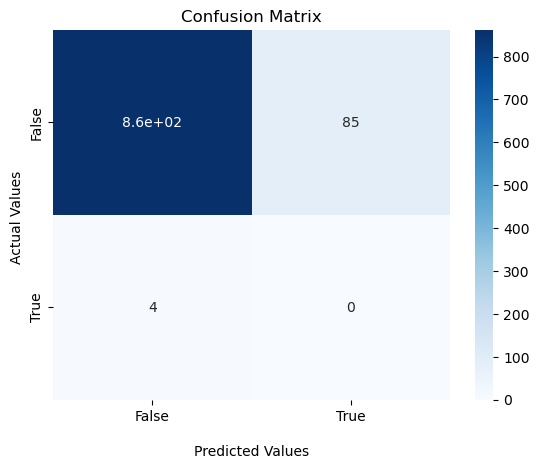

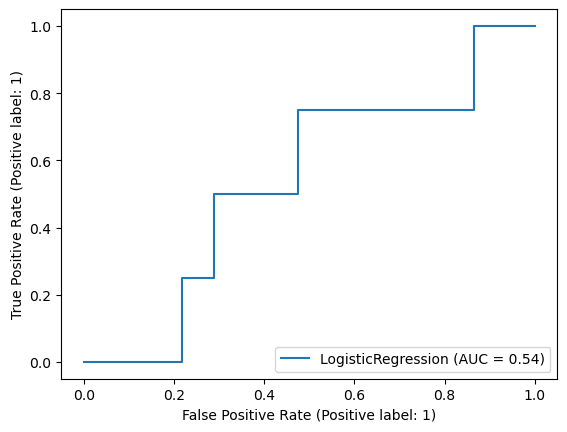

In [33]:
# Classification Report
print('LOGISTIC REGRESSION')
print(classification_report(y_test2, y_pred))

cf_matrix = confusion_matrix(y_test2, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Display the visualization of the ROC curve.
plot_roc_curve(model, X_test2, y_test2)
plt.show()

# Decision Tree

In [34]:
estimator = DecisionTreeClassifier(random_state=0)
selector = RFECV(estimator, step=1, cv=None)
selector = selector.fit(X_resampled, y_resampled)

In [35]:
tmp = list(zip(selector.support_, selector.ranking_, X_resampled.columns))
# Seleccionar únicamente las columnas que RFECV considera relevantes
columns_to_remove = list(map(lambda x: x[2], filter(lambda x: not x[0], tmp)))
X_test_injury_DT = X_test_injury.drop(columns_to_remove,axis=1)
X_test_NOinjury_DT = X_test_NOinjury.drop(columns_to_remove,axis=1)

In [36]:
tmp

[(False, 38, 'Distance(m)'),
 (False, 36, 'Dist (m/min)'),
 (False, 35, 'HMLD (m)'),
 (False, 34, '% ALTA INTENSIDAD'),
 (False, 33, 'Distance Acc(m)'),
 (False, 32, 'Distance Dec(m)'),
 (False, 31, 'HSR Abs Dist (m)'),
 (False, 30, 'HSR Abs (m/min)'),
 (False, 29, 'Sprint Abs(m)'),
 (True, 1, 'Sprints ABS'),
 (False, 10, 'MAX Speed(km/h)'),
 (False, 7, 'Step Balance(%)'),
 (False, 4, 'Player Load '),
 (False, 5, 'Power met'),
 (False, 2, 'duration'),
 (False, 3, 'Acute_Dis'),
 (True, 1, 'Chronic_Dis'),
 (True, 1, 'ACWR_Dis'),
 (True, 1, 'EWMA_Dis'),
 (False, 11, 'Mean_Dis'),
 (False, 21, 'Std_Dis'),
 (False, 25, 'MSWR_Dis'),
 (False, 26, 'Acute_HMLD'),
 (False, 13, 'Chronic_HMLD'),
 (False, 37, 'ACWR_HMLD'),
 (False, 15, 'EWMA_HMLD'),
 (False, 17, 'Mean_HMLD'),
 (False, 19, 'Std_HMLD'),
 (False, 27, 'MSWR_HMLD'),
 (False, 28, 'Acute_HSR'),
 (False, 23, 'Chronic_HSR'),
 (False, 24, 'ACWR_HSR'),
 (False, 22, 'EWMA_HSR'),
 (False, 20, 'Mean_HSR'),
 (False, 18, 'Std_HSR'),
 (False, 16, 'M

In [37]:
### Dividir test set en 2
#(A una mitad se le aplica ADASYN y a la otra mitad no)

X_train2_injury, X_test2_injury, y_train2_injury, y_test2_injury = train_test_split(X_test_injury_DT, y_test_injury, test_size=0.5, random_state=42)
X_train2_NOinjury, X_test2_NOinjury, y_train2_NOinjury, y_test2_NOinjury = train_test_split(X_test_NOinjury_DT, y_test_NOinjury, test_size=0.5, random_state=42)

frames = [X_test2_injury, X_test2_NOinjury]
X_test2 = pd.concat(frames)

frames = [X_train2_injury, X_train2_NOinjury]
X_train2 = pd.concat(frames)

frames = [y_test2_injury, y_test2_NOinjury]
y_test2 = pd.concat(frames)

y_test2['injury'].value_counts()

frames = [y_train2_injury, y_train2_NOinjury]
y_train2 = pd.concat(frames)

y_train2['injury'].value_counts()

### Oversampling con ADASYN en una mitad del test set

X_resampled2, y_resampled2 = ADASYN(n_neighbors=3).fit_resample(X_train2, y_train2)

#Check how many injury vs no injury
y_resampled2['injury'].value_counts()

1    948
0    947
Name: injury, dtype: int64

In [38]:
# Decision Tree
model = DecisionTreeClassifier(random_state=0)
model.fit(X_resampled2, y_resampled2)

DecisionTreeClassifier(random_state=0)

In [39]:
# Parameter Optimization
param_grid = {
    'criterion':['gini', 'entropy'],
    'max_depth':[1, 10, 100],
    'random_state':[0, 10],
}

optimal_params = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs=10,
    cv=3
)

optimal_params.fit(X_resampled2, y_resampled2)
print(optimal_params.best_params_)

{'criterion': 'gini', 'max_depth': 100, 'random_state': 10}


In [40]:
# Building Optimized Model
tree_clf = DecisionTreeClassifier(max_depth=100,
                           criterion='gini',
                           random_state=10,
                           class_weight={0:1,1:150})

tree_clf.fit(X_resampled2, y_resampled2)
score = tree_clf.score(X_test2, y_test2)
y_pred = tree_clf.predict(X_test2)

DECISION TREE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       947
           1       0.00      0.00      0.00         4

    accuracy                           0.99       951
   macro avg       0.50      0.50      0.50       951
weighted avg       0.99      0.99      0.99       951



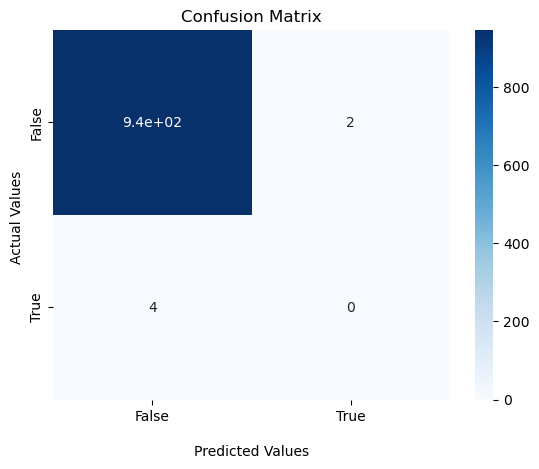

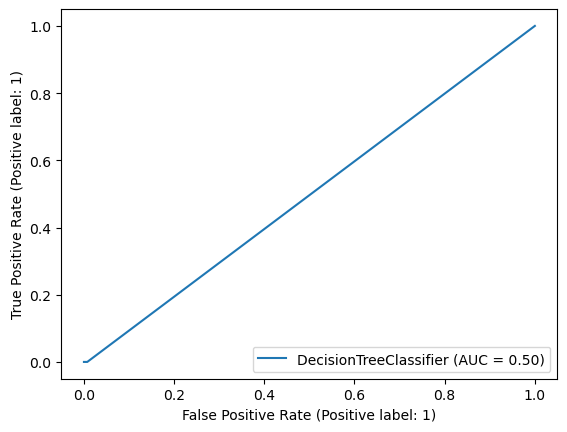

In [41]:
# Classification Report
print('DECISION TREE')
print(classification_report(y_test2, y_pred))
    
cf_matrix = confusion_matrix(y_test2, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
    
plot_roc_curve(model, X_test2, y_test2)
plt.show()

# Random Forest

In [42]:
estimator = RandomForestClassifier(random_state=0)
selector = RFECV(estimator, step=1, cv=None)
selector = selector.fit(X_resampled, y_resampled)

In [43]:
tmp = list(zip(selector.support_, selector.ranking_, X_resampled.columns))
# Seleccionar únicamente las columnas que RFECV considera relevantes
columns_to_remove = list(map(lambda x: x[2], filter(lambda x: not x[0], tmp)))
X_test_injury_RF = X_test_injury.drop(columns_to_remove,axis=1)
X_test_NOinjury_RF = X_test_NOinjury.drop(columns_to_remove,axis=1)

In [44]:
tmp

[(False, 8, 'Distance(m)'),
 (False, 21, 'Dist (m/min)'),
 (False, 16, 'HMLD (m)'),
 (False, 17, '% ALTA INTENSIDAD'),
 (False, 9, 'Distance Acc(m)'),
 (False, 26, 'Distance Dec(m)'),
 (False, 29, 'HSR Abs Dist (m)'),
 (False, 28, 'HSR Abs (m/min)'),
 (False, 27, 'Sprint Abs(m)'),
 (True, 1, 'Sprints ABS'),
 (False, 11, 'MAX Speed(km/h)'),
 (False, 25, 'Step Balance(%)'),
 (False, 23, 'Player Load '),
 (False, 14, 'Power met'),
 (False, 10, 'duration'),
 (True, 1, 'Acute_Dis'),
 (False, 5, 'Chronic_Dis'),
 (True, 1, 'ACWR_Dis'),
 (True, 1, 'EWMA_Dis'),
 (True, 1, 'Mean_Dis'),
 (True, 1, 'Std_Dis'),
 (True, 1, 'MSWR_Dis'),
 (False, 18, 'Acute_HMLD'),
 (True, 1, 'Chronic_HMLD'),
 (False, 3, 'ACWR_HMLD'),
 (True, 1, 'EWMA_HMLD'),
 (False, 24, 'Mean_HMLD'),
 (True, 1, 'Std_HMLD'),
 (True, 1, 'MSWR_HMLD'),
 (False, 15, 'Acute_HSR'),
 (True, 1, 'Chronic_HSR'),
 (False, 20, 'ACWR_HSR'),
 (False, 12, 'EWMA_HSR'),
 (False, 13, 'Mean_HSR'),
 (False, 6, 'Std_HSR'),
 (False, 22, 'MSWR_HSR'),
 (Fal

In [45]:
### Dividir test set en 2
#(A una mitad se le aplica ADASYN y a la otra mitad no)

X_train2_injury, X_test2_injury, y_train2_injury, y_test2_injury = train_test_split(X_test_injury_RF, y_test_injury, test_size=0.5, random_state=42)
X_train2_NOinjury, X_test2_NOinjury, y_train2_NOinjury, y_test2_NOinjury = train_test_split(X_test_NOinjury_RF, y_test_NOinjury, test_size=0.5, random_state=42)

frames = [X_test2_injury, X_test2_NOinjury]
X_test2 = pd.concat(frames)

frames = [X_train2_injury, X_train2_NOinjury]
X_train2 = pd.concat(frames)

frames = [y_test2_injury, y_test2_NOinjury]
y_test2 = pd.concat(frames)

y_test2['injury'].value_counts()

frames = [y_train2_injury, y_train2_NOinjury]
y_train2 = pd.concat(frames)

y_train2['injury'].value_counts()

### Oversampling con ADASYN en una mitad del test set

X_resampled2, y_resampled2 = ADASYN(n_neighbors=3).fit_resample(X_train2, y_train2)

#Check how many injury vs no injury
y_resampled2['injury'].value_counts()

1    948
0    947
Name: injury, dtype: int64

In [46]:
# Random Forest
model = RandomForestClassifier(random_state=0)
model.fit(X_resampled2, y_resampled2)

<ipython-input-46-d70eea8c3129>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled2, y_resampled2)


RandomForestClassifier(random_state=0)

In [47]:
# Parameter Optimization
param_grid = {
    'n_estimators':[10, 10, 100],
    'max_depth':[1, 10, 100],
    'random_state':[1, 10]
}

optimal_params = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs=10,
    cv=3
)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'max_depth': 1, 'n_estimators': 10, 'random_state': 1}


C:\Users\ferbm\anaconda3\envs\computer_vision\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [48]:
# Building Optimized Model
clf_RF = RandomForestClassifier(max_depth=1,
                           n_estimators=10,
                           random_state=1,
                           class_weight={0:1,1:120})

clf_RF.fit(X_resampled2, y_resampled2)
score = clf_RF.score(X_test2, y_test2)
y_pred = clf_RF.predict(X_test2)

<ipython-input-48-764e06e4b06f>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF.fit(X_resampled2, y_resampled2)


RANDOM FOREST
              precision    recall  f1-score   support

           0       1.00      0.24      0.38       947
           1       0.00      0.75      0.01         4

    accuracy                           0.24       951
   macro avg       0.50      0.49      0.20       951
weighted avg       0.99      0.24      0.38       951



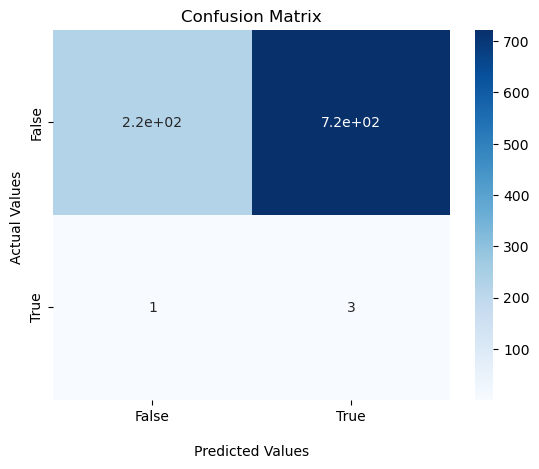

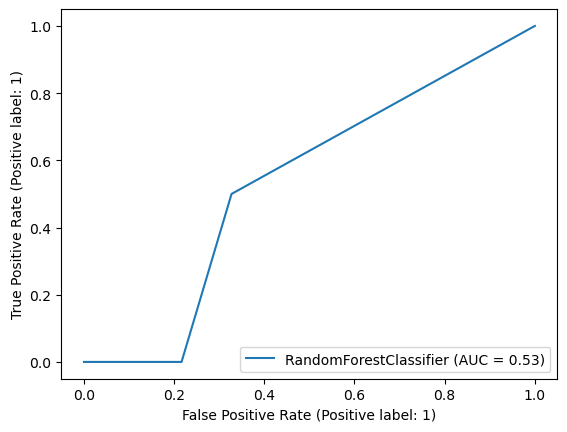

In [49]:
# Classification Report
print('RANDOM FOREST')
print(classification_report(y_test2, y_pred))
    
cf_matrix = confusion_matrix(y_test2, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
    
plot_roc_curve(model, X_test2, y_test2)
plt.show()